In [1]:
import tkinter as tk
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sci
from qutip.solver import Options
def MS_deley_parity(rsb,bsb,rabi,nbar,time_start,time_end):
    options = Options(nsteps=1000000) #reset the ode step to larger number
    gac  = 1 * 2 * np.pi  #ac coupling strength Rabi frequency
    gbc  = 1 * 2 * np.pi  #bc coupling strength Rabi frequency
    N = 2               # d.o.f of a,b states
    Nc= 10          # d.o.f of c state 
    rsbe=rsb*2 * np.pi/rabi     #normalized detuning               
    bsbe=bsb*2 * np.pi/rabi     #normalized detuning
    tm=abs((time_end-time_start)*50)
    t=np.linspace(time_start,time_end,tm) #timce

    psi0 = qt.tensor(qt.fock_dm(N,1), qt.fock_dm(N,1),qt.thermal_dm(Nc,nbar))     # intial state 
    a  = qt.tensor(qt.destroy(N), qt.qeye(N),qt.qeye(Nc)) #a operator atom1
    b  = qt.tensor(qt.qeye(N), qt.destroy(N),qt.qeye(Nc)) #b operator atom2
    c  = qt.tensor(qt.qeye(N), qt.qeye(N),qt.destroy(Nc)) #c operator motional mode
    e  = qt.Qobj([[0,0],[0,1]])
    g  = qt.Qobj([[1,0],[0,0]])
    ee=qt.tensor(e,e,qt.qeye(Nc))
    eg=qt.tensor(e,g,qt.qeye(Nc))
    ge=qt.tensor(g,e,qt.qeye(Nc))
    gg=qt.tensor(g,g,qt.qeye(Nc))
    def Hbsb_plus(t, args):
        return np.exp(-1j*bsbe*t)/2
    def Hbsb_minus(t, args):
        return np.exp(1j*bsbe*t)/2
    def Hrsb_plus(t, args):
        return np.exp(-1j*rsbe*t)/2
    def Hrsb_minus(t, args):
        return np.exp(1j*rsbe*t)/2
    #the above four function is for detuning
    H=[[gac *a.dag() *c.dag(),Hbsb_plus],[gac *a *c,Hbsb_minus],
       [gac *a.dag() *c,Hrsb_plus],[gac *a *c.dag(),Hrsb_minus],
       [gbc *b.dag() *c.dag(),Hbsb_plus],[gbc *b *c,Hbsb_minus],
       [gbc *b.dag() *c,Hrsb_plus],[gbc *b *c.dag(),Hrsb_minus]] #interation hamiltonian
    output=qt.mesolve(H,psi0,t/2,options=options)  #run the simulation
    p=[]
    parity=[]
    for h in range(0,tm):
        p.append(np.real(np.trace((gg*2+eg+ge)*output.states[h].full())))  #data processing
        parity.append(np.real(np.trace((gg-eg-ge+ee)*output.states[h].full()))) #data procesing
    
    plt.figure(figsize=(16,8))
    plt.xlabel('Time')
    plt.ylabel('2|gg>+|eg>+|ge>,Brightness')
    plt.grid(True)
    plt.title('MS gate deley scan')
    plt.plot(np.linspace(time_start,time_end,tm),p) #plot first graph
    
    plt.figure(figsize=(16,8))
    plt.xlabel('Time')
    plt.ylabel('|gg>-|eg>-|ge>+|ee>')
    plt.grid(True)
    plt.title('MS gate parity scan,parity')
    plt.plot(np.linspace(time_start,time_end,tm),parity) #plot second graph

## USE the below cell to simulate delay scan for MS gate and parity
#### Rsb should be smaller than zero in defult (different sign to bsb)
#### time unit is how many PI times
#### nbar is for temperature
#### optimized parpmeter is rsb=-2, bsb=2 or  rsb=2, bsb=-2

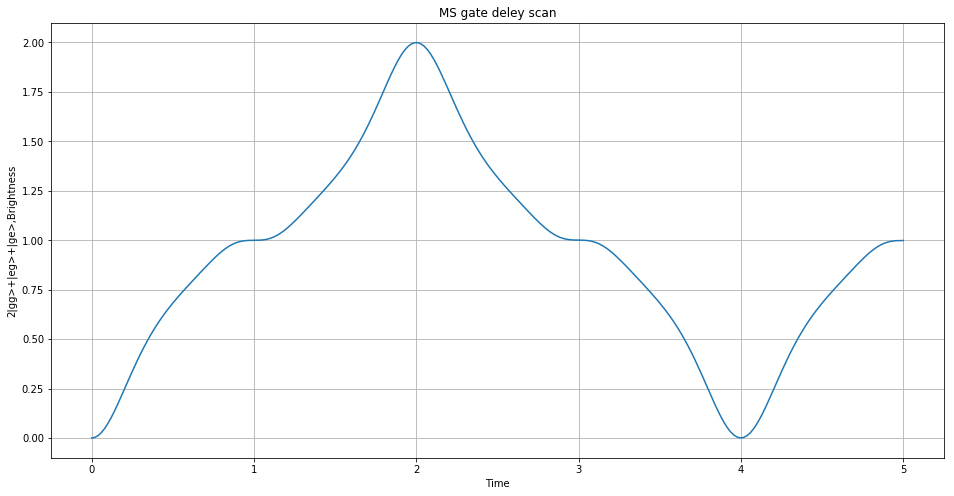

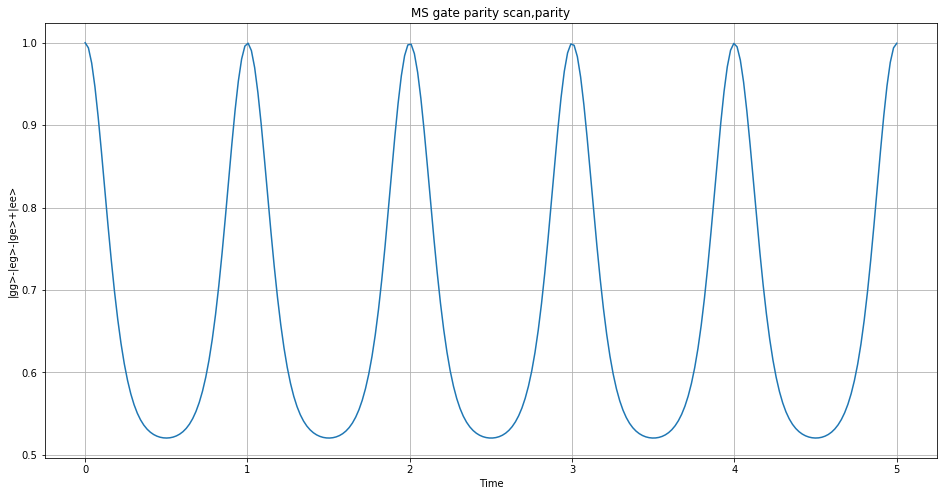

In [4]:
MS_deley_parity(rsb=-2,bsb=2,rabi=1,nbar=0.3,time_start=0,time_end=5)

In [9]:
def MS_frequency(rsb,bsb,rabi,nbar,time_start,time_end):
    options = Options(nsteps=1000000) #reset the ode step to larger number
    gac  = 1 * 2 * np.pi 
    gbc  = 1 * 2 * np.pi 
    N = 2              
    Nc= 10         
    tm=abs((time_end-time_start)*50)
    t=np.linspace(time_start,time_end,tm) #timce domain
    psi0 = qt.tensor(qt.fock_dm(N,1), qt.fock_dm(N,1),qt.thermal_dm(Nc,nbar)) 
    # operators
    a  = qt.tensor(qt.destroy(N), qt.qeye(N),qt.qeye(Nc)) 
    b  = qt.tensor(qt.qeye(N), qt.destroy(N),qt.qeye(Nc)) 
    c  = qt.tensor(qt.qeye(N), qt.qeye(N),qt.destroy(Nc)) 
    e  = qt.Qobj([[0,0],[0,1]])
    g  = qt.Qobj([[1,0],[0,0]])
    ee=qt.tensor(e,e,qt.qeye(Nc))
    eg=qt.tensor(e,g,qt.qeye(Nc))
    ge=qt.tensor(g,e,qt.qeye(Nc))
    gg=qt.tensor(g,g,qt.qeye(Nc))
    def Hbsb_plus(t, args):
        return np.exp(-1j*bsbe*t)/2
    def Hbsb_minus(t, args):
        return np.exp(1j*bsbe*t)/2
    def Hrsb_plus(t, args):
        return np.exp(-1j*rsbe*t)/2
    def Hrsb_minus(t, args):
        return np.exp(1j*rsbe*t)/2
    #the above four function is for detuning
    H=[[gac *a.dag() *c.dag(),Hbsb_plus],[gac *a *c,Hbsb_minus],
       [gac *a.dag() *c,Hrsb_plus],[gac *a *c.dag(),Hrsb_minus],
       [gbc *b.dag() *c.dag(),Hbsb_plus],[gbc *b *c,Hbsb_minus],
       [gbc *b.dag() *c,Hrsb_plus],[gbc *b *c.dag(),Hrsb_minus]]

    p=[]
    for h in range(0,100):
        hh=(h-100/2)/10
        rsbe=(rsb/rabi-hh)*2 * np.pi                   
        bsbe=(bsb/rabi+hh)*2 * np.pi
        output=qt.mesolve(H,psi0,t/2,options=options) #see the state
        p.append(np.real(np.trace((gg*2+eg+ge)*output.states[-1].full())))
        #print(hh,np.real(np.trace((gg*2+eg+ge)*output.states[-1].full())))
    plt.figure(figsize=(16,8))
    plt.xlabel('frequency(DETUNE/RABI)')
    plt.ylabel('2|gg>+|eg>+|ge>')
    plt.grid(True)
    plt.title('MS gate frequency scan -5 to 5 half PI ')
    plt.plot(np.linspace(-5,4.9,num=100),p)
    #plt.savefig('MS frequency scan -5 to 5 half PI S.png')

## USE the below cell to simulate frequency scan for MS gate and parity
#### time unit is how many PI times
#### nbar is for temperature
### here rsb and bsb are how off we tpye in the experimet compare with the correct frequency
#### rsb and bsb defult should be (0,0) and the simulating take about 15 seconds (on my laptop) 

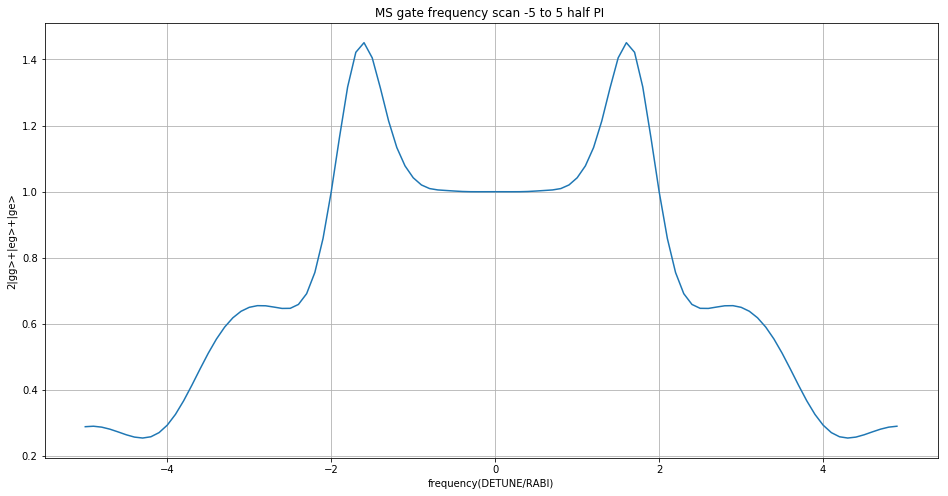

In [10]:
MS_frequency(rsb=0,bsb=0,rabi=1,nbar=0.3,time_start=0,time_end=1)